# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import PyPDF2
%matplotlib inline
%matplotlib notebook

In [28]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [29]:
sinasc.index

RangeIndex(start=0, stop=27028, step=1)

In [30]:
estrutura_sinasc = open('/Users/feldb/OneDrive/Documentos/Ebac/Tarefas/Modulo 06/Estrutura_SINASC_para_CD.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(estrutura_sinasc)
page = read_pdf.getPage(0)
page_content = page.extractText()
pdf = page_content.encode('utf-8')
pdf

b'Estrutura de Dados SINASC \n \n \nSecretaria de Vigil\xc3\xa2ncia em Sa\xc3\xbade / MS    1 \n Estrutura do SINASC para o CD-ROM \n \nOs arquivos s\xc3\xa3o DBF e est\xc3\xa3o compactados na forma de  DBC. Para descompact\xc3\xa1-los, ou expandi-los \nutilize o TABWIN, op\xc3\xa7\xc3\xa3o Arquivos Comprime/Expande a rquivos DBF  \n \nOs campos dos arquivos s\xc3\xa3o os seguintes: \n \nCAMPO \nFORMUL\xc3\x81RIO SEQ  NOME  TIPO/TAM  DESCRI\xc3\x87\xc3\x83O  \nDeclara\xc3\xa7\xc3\xa3o 01 NUMERODN C(08) N\xc3\xbamero da DN,  seq\xc3\xbcenc ial por UF informante e por ano. \n6 02 LOCNASC C(01) Local de ocorr\xc3\xaancia do nascimento, conforme a tabel a: \n9:   Ignorado \n1:   Hospital \n2:   Outro Estab Sa\xc3\xbade \n3:   Domic\xc3\xadlio \n4:   Outros \n7 03 CODESTAB C(07) C\xc3\xb3digo de estabelecimento de sa \xc3\xbade. \n10 04 CODBAINASC C(08) C\xc3\xb3digo Bairro nascimento. \n11 05 CODMUNNASC  C(07) C\xc3\xb3digo do munic\xc3\xadpio de ocorr\xc3\xaancia. \n15 06 IDADEMAE C(02) I

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [31]:
sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0
...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0


In [32]:
# Corrigindo os valores da coluna 'SEXO' conforme 'Estrutura_SINASC_para_CD.pdf':

#0: Ignorado
#1: Masculino
#2: Feminino

sinasc['SEXO']= sinasc['SEXO'].replace('Ignorado', 1)
sinasc['SEXO']= sinasc['SEXO'].replace('Feminino', 1)
sinasc['SEXO']= sinasc['SEXO'].replace('Masculino', 2)
sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,2.0,37 a 41 semanas,5.0
1,8.0,9.0,1.0,37 a 41 semanas,2.0
2,8.0,10.0,1.0,37 a 41 semanas,9.0
3,9.0,10.0,1.0,37 a 41 semanas,5.0
4,8.0,10.0,1.0,37 a 41 semanas,2.0
...,...,...,...,...,...
27023,8.0,9.0,2.0,32 a 36 semanas,2.0
27024,8.0,9.0,2.0,37 a 41 semanas,1.0
27025,9.0,10.0,2.0,37 a 41 semanas,2.0
27026,8.0,9.0,2.0,32 a 36 semanas,2.0


In [33]:
# Corrigindo os valores da coluna 'GESTACAO' conforme 'Estrutura_SINASC_para_CD.pdf':

#Semanas de gestação, conforme a tabela:
#9: Ignorado
#1: Menos de 22 semanas
#2: 22 a 27 semanas
#3: 28 a 31 semanas
#4: 32 a 36 semanas
#5: 37 a 41 semanas
#6: 42 semanas e mais

sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['Ignorado'], 0)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['Menos de 22 semanas'], 1)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['22 a 27 semanas'], 2)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['28 a 31 semanas'], 3)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['32 a 36 semanas'], 4)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['37 a 41 semanas'], 5)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['42 semanas e mais'], 6)
sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,2.0,5.0,5.0
1,8.0,9.0,1.0,5.0,2.0
2,8.0,10.0,1.0,5.0,9.0
3,9.0,10.0,1.0,5.0,5.0
4,8.0,10.0,1.0,5.0,2.0
...,...,...,...,...,...
27023,8.0,9.0,2.0,4.0,2.0
27024,8.0,9.0,2.0,5.0,1.0
27025,9.0,10.0,2.0,5.0,2.0
27026,8.0,9.0,2.0,4.0,2.0


<IPython.core.display.Javascript object>


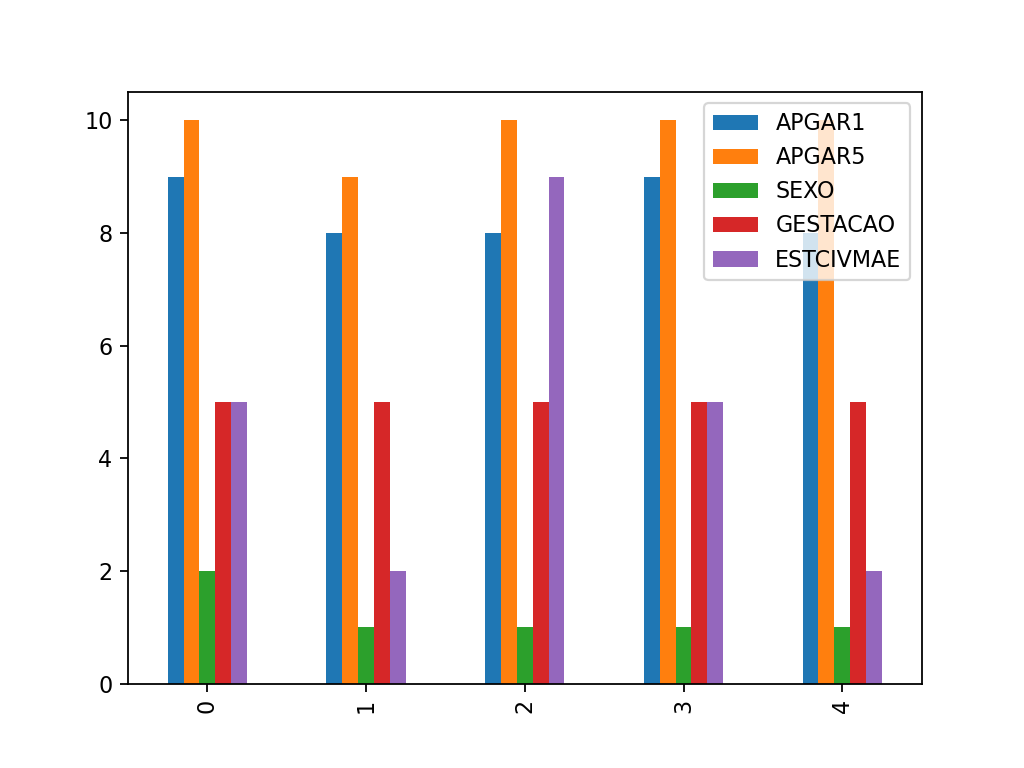

In [35]:
sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']].head().plot(kind='bar')
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [36]:
# Alternativa 1:
sinasc[[ 'APGAR5', 'CONSULTAS']]

,APGAR5,CONSULTAS
0,10.0,4
1,9.0,4
2,10.0,4
3,10.0,3
4,10.0,4
...,...,...
27023,9.0,4
27024,9.0,4
27025,10.0,4
27026,9.0,4


In [37]:
sinasc_grp = sinasc.groupby('CONSULTAS').agg({'APGAR5':np.sum}).reset_index()
px.bar(sinasc_grp, x='CONSULTAS', y='APGAR5', title= 'APGAR5 médio x CONSULTAS')


<IPython.core.display.Javascript object>


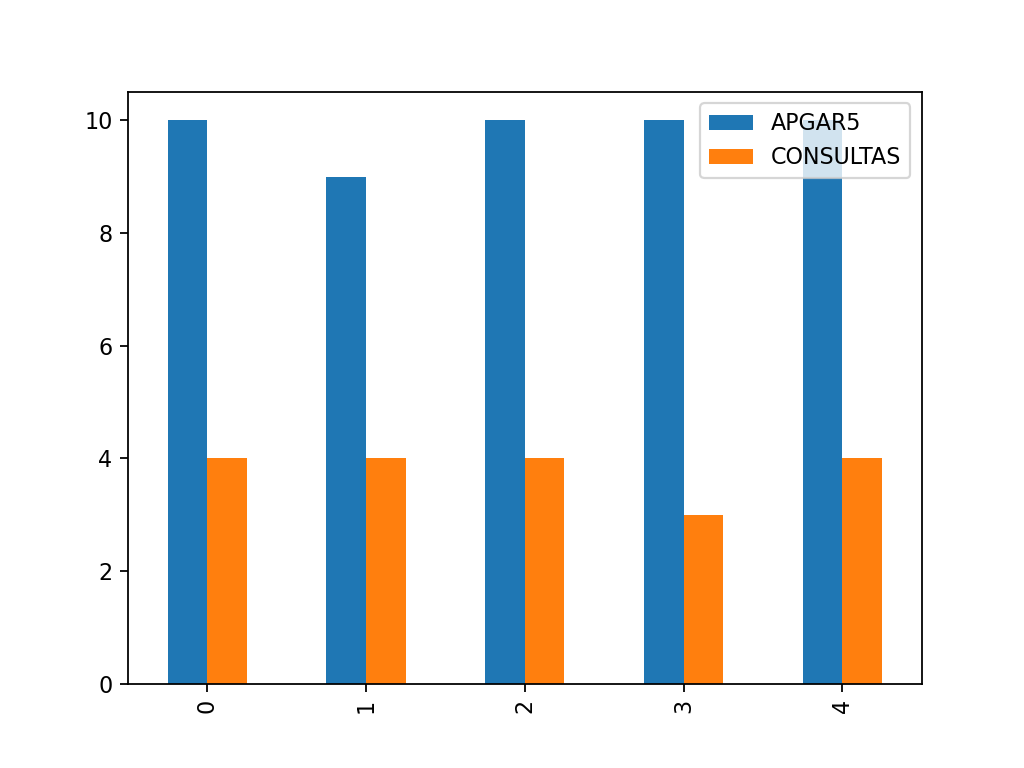

In [38]:
# Alterantiva 2
sinasc[['APGAR5', 'CONSULTAS']].head().plot(kind='bar')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<IPython.core.display.Javascript object>


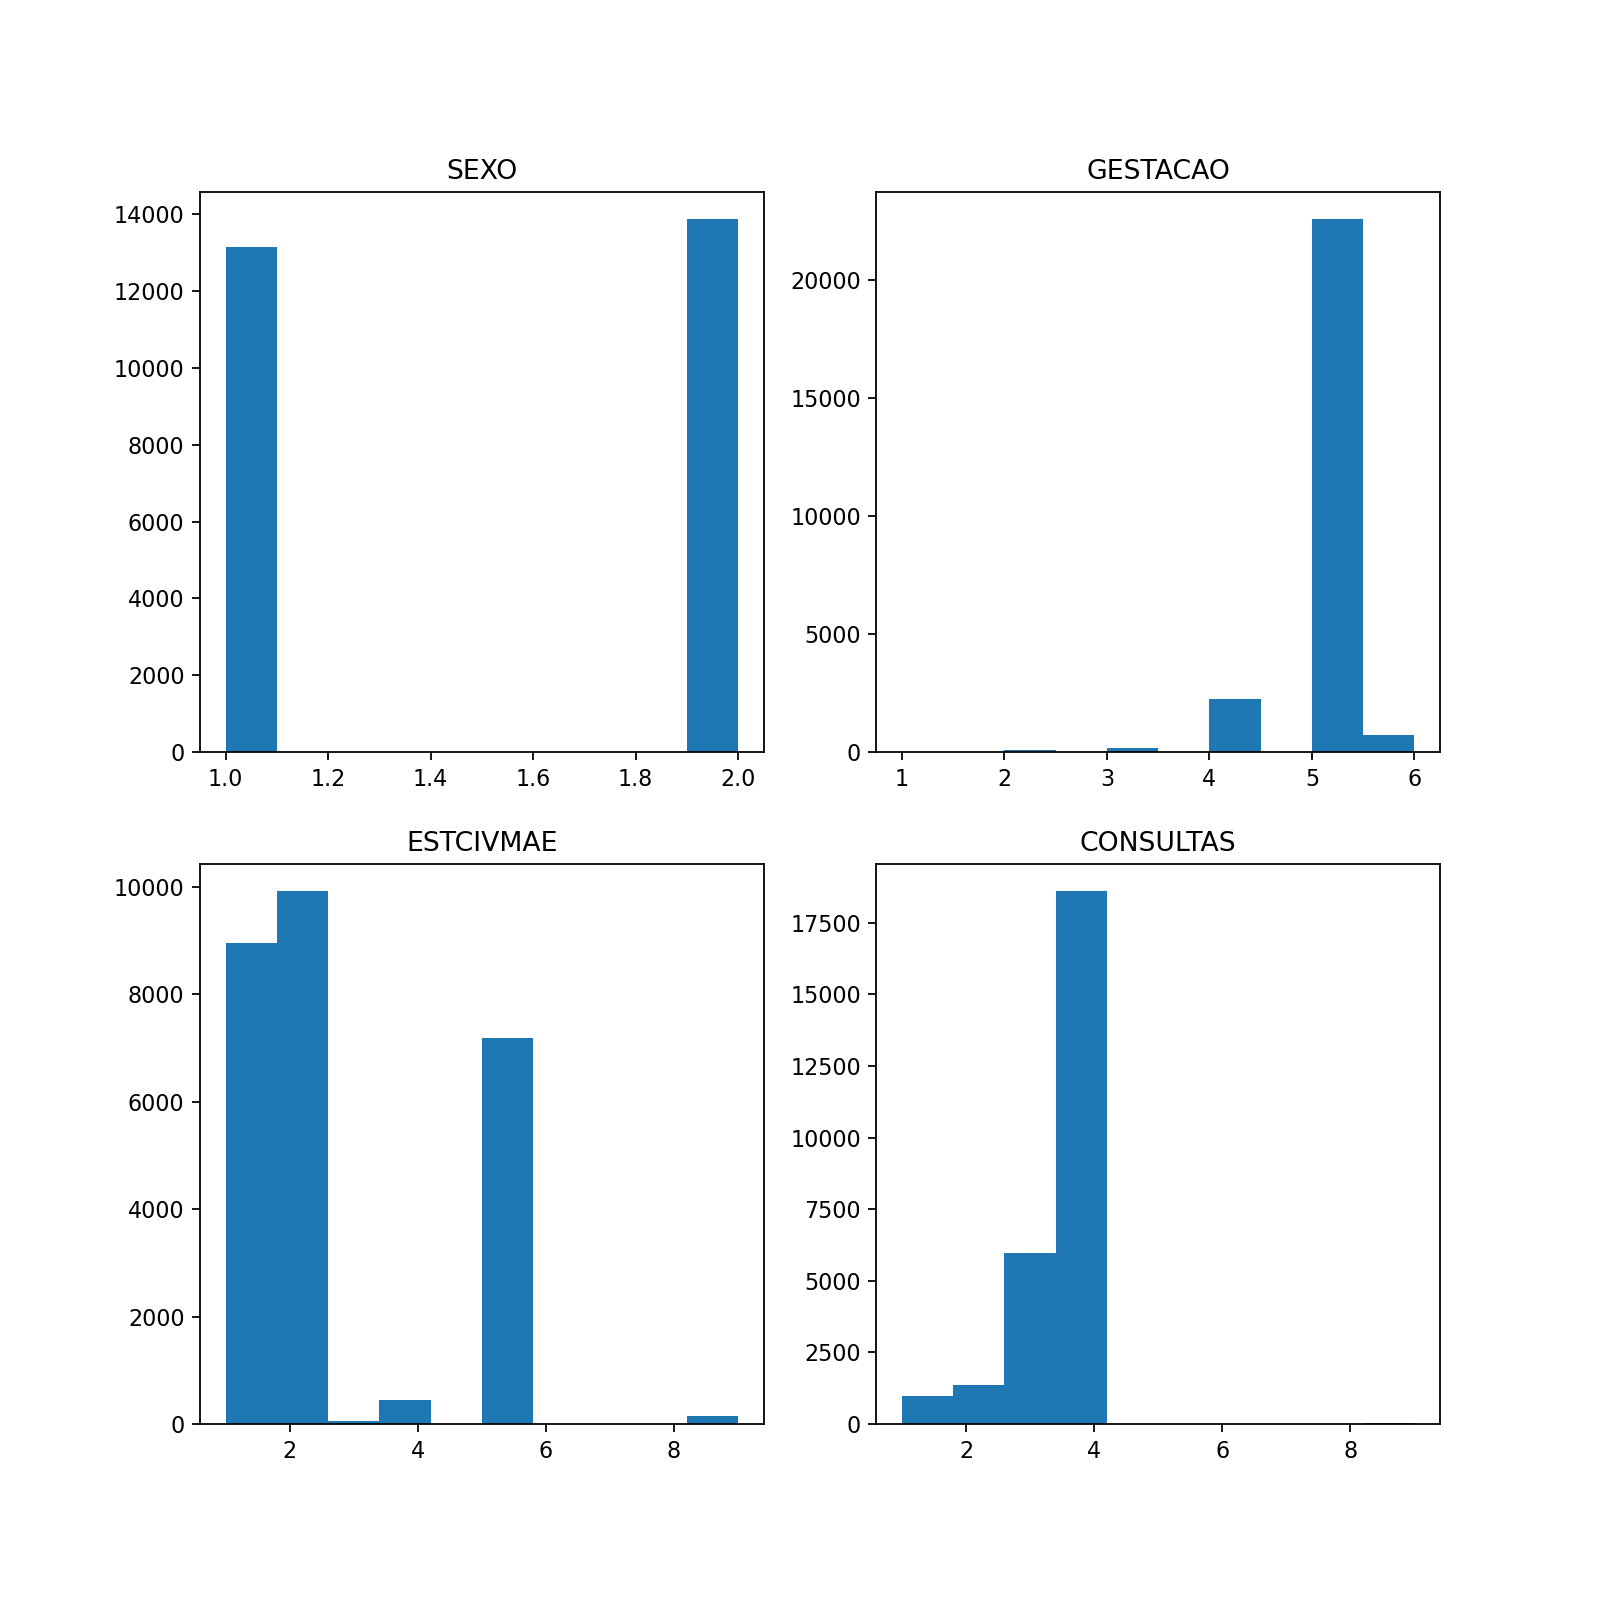

In [39]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(sinasc['SEXO'])
ax1.set_title('SEXO')

_ = ax2.hist(sinasc['GESTACAO'])
ax2.set_title('GESTACAO')

_ = ax3.hist(sinasc['ESTCIVMAE'])
ax3.set_title('ESTCIVMAE')

_ = ax4.hist(sinasc['CONSULTAS'])
ax4.set_title('CONSULTAS')

plt.show()